<a href="https://colab.research.google.com/github/kraju1896/V-S-SAI-KANAKA-RAJU_Info5731_Fall2024/blob/main/V_S_Sai_Kanaka_Raju_Bonam_of_INFO5731_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [ ]:
# 📦 Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import random

#  Download NLTK Resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#  Load Dataset
df = pd.read_csv(
    'dataset.csv',
    encoding='latin-1',
    usecols=[2, 3],  # Assuming 3rd and 4th columns are sentiment and tweet
    names=["sentiment", "tweet"],
    header=None
)

#  Map Sentiment to Numeric Labels
sentiment_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df['sentiment'] = df['sentiment'].map(sentiment_map)

#  Drop rows with missing values
df.dropna(inplace=True)

#  Text Preprocessing Function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|@\S+|#\S+|[^a-z\s]", '', text)  # Remove URLs, mentions, hashtags, punctuation
    tokens = word_tokenize(text)  # Tokenize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned_tokens)

#  Apply Preprocessing
df['clean_text'] = df['tweet'].apply(preprocess_text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


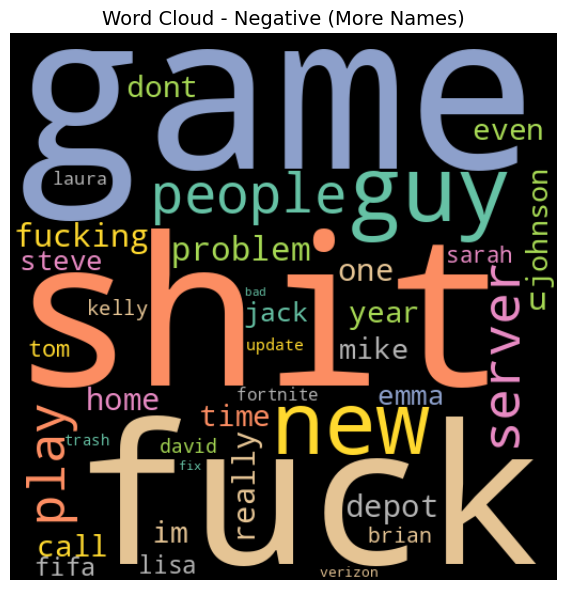

In [ ]:
# # Word clouds for each sentiment
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for each sentiment
labels = ['Negative', 'Neutral', 'Positive']
for i, label in enumerate(labels):
    # Join all cleaned tweets for the current sentiment
    text_data = ' '.join(df[df['sentiment'] == i]['clean_text'].dropna())

    # Skip if no text is found
    if text_data.strip():
        wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Set2').generate(text_data)

        # Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word Cloud - {label}", fontsize=16)
        plt.tight_layout()
        plt.show()




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

X = df['clean_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': LinearSVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    predictions = model.predict(X_test_vec)

    print(f"\n=== {name} ===")
    print(classification_report(y_test, predictions, target_names=['Negative', 'Neutral', 'Positive']))



=== Naive Bayes ===
              precision    recall  f1-score   support

    Negative       0.70      0.82      0.75      4427
     Neutral       0.76      0.54      0.63      3678
    Positive       0.70      0.75      0.73      4120

    accuracy                           0.71     12225
   macro avg       0.72      0.70      0.70     12225
weighted avg       0.72      0.71      0.71     12225


=== SVM ===
              precision    recall  f1-score   support

    Negative       0.76      0.83      0.80      4427
     Neutral       0.77      0.68      0.72      3678
    Positive       0.77      0.77      0.77      4120

    accuracy                           0.77     12225
   macro avg       0.77      0.76      0.76     12225
weighted avg       0.77      0.77      0.77     12225



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:13:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost ===
              precision    recall  f1-score   support

    Negative       0.65      0.85      0.74      4427
     Neutral       0.75      0.54      0.63      3678
    Positive       0.75      0.68      0.71      4120

    accuracy                           0.70     12225
   macro avg       0.72      0.69      0.69     12225
weighted avg       0.71      0.70      0.70     12225



## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
# import necessary libraries
import pandas as pd

# Load train data
with open('stsa-train.txt', 'r', encoding='utf-8') as f:
    train_lines = f.readlines()
train_data = [(line[0], line[2:].strip()) for line in train_lines if line.strip()]
df_train = pd.DataFrame(train_data, columns=['Label', 'Text'])
df_train['Label'] = df_train['Label'].astype(int)

# Load test data
with open('stsa-test.txt', 'r', encoding='utf-8') as f:
    test_lines = f.readlines()
test_data = [(line[0], line[2:].strip()) for line in test_lines if line.strip()]
df_test = pd.DataFrame(test_data, columns=['Label', 'Text'])
df_test['Label'] = df_test['Label'].astype(int)


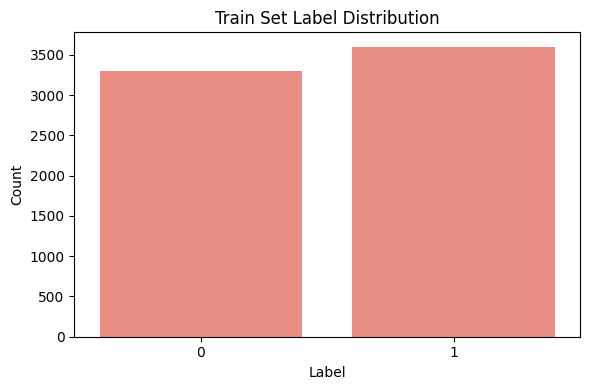

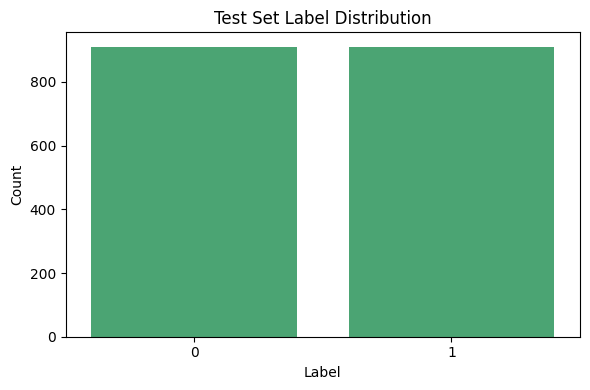

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df_train, x='Label')
plt.title("Train Set Label Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df_test, x='Label')
plt.title("Test Set Label Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Calculate average text length (in words)
df_train['text_length'] = df_train['Text'].apply(lambda x: len(str(x).split()))
df_test['text_length'] = df_test['Text'].apply(lambda x: len(str(x).split()))

# Print basic statistics for text lengths
print("Train text length:\n", df_train['text_length'].describe())
print("\nTest text length:\n", df_test['text_length'].describe())


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(df_test['Text'])

# Define Models
models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

#  Helper Function to Compute Metrics
def get_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred)
    }

# Model Evaluation Function
def evaluate_model(name, model, X_train, y_train, X_val, y_val, X_test, y_test):
    print(f"\nEvaluating {name}")

    # Perform 10-fold CV on training set
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    print(f"Avg CV F1 Score: {cv_scores.mean():.4f}")

    # Fit model and predict
    model.fit(X_train, y_train)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)

    # Get metrics
    val_metrics = get_metrics(y_val, val_preds)
    test_metrics = get_metrics(y_test, test_preds)

    print("Validation:", val_metrics)
    print("Test:", test_metrics)

    return name, val_metrics, test_metrics

# Evaluate All Models
results = []
for name, model in models.items():
    result = evaluate_model(
        name, model,
        X_train_tfidf, y_train,
        X_val_tfidf, y_val,
        X_test_tfidf, df_test['Label']
    )
    results.append(result)



Evaluating SVM
Avg CV F1 Score: 0.7966
Validation: {'Accuracy': 0.7687861271676301, 'Precision': 0.7630890052356021, 'Recall': 0.8074792243767313, 'F1': 0.784656796769852}
Test: {'Accuracy': 0.8012081274025261, 'Precision': 0.7894179894179895, 'Recall': 0.8206820682068207, 'F1': 0.8047464940668824}

Evaluating KNN
Avg CV F1 Score: 0.5234
Validation: {'Accuracy': 0.528179190751445, 'Precision': 0.5496402877697841, 'Recall': 0.5290858725761773, 'F1': 0.5391672547635851}
Test: {'Accuracy': 0.5205930807248764, 'Precision': 0.519438444924406, 'Recall': 0.5291529152915292, 'F1': 0.52425068119891}

Evaluating Decision Tree
Avg CV F1 Score: 0.6367
Validation: {'Accuracy': 0.588150289017341, 'Precision': 0.6076487252124646, 'Recall': 0.5941828254847645, 'F1': 0.6008403361344538}
Test: {'Accuracy': 0.615595826468973, 'Precision': 0.611764705882353, 'Recall': 0.6292629262926293, 'F1': 0.6203904555314533}

Evaluating Random Forest
Avg CV F1 Score: 0.7308
Validation: {'Accuracy': 0.700144508670520

## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
# Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load dataset
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')  # replace with actual filename
df = df.head(2000)

print(df['Reviews'].isnull().sum())

0


In [ ]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

df = df.dropna()

def preprocess(text):
    text = re.sub(r"http\S+|@\S+|#\S+|[^A-Za-z\s]", '', text.lower())
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    return ' '.join([w for w in tokens if w not in stop_words])

df['clean_text'] = df['Reviews'].apply(preprocess)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


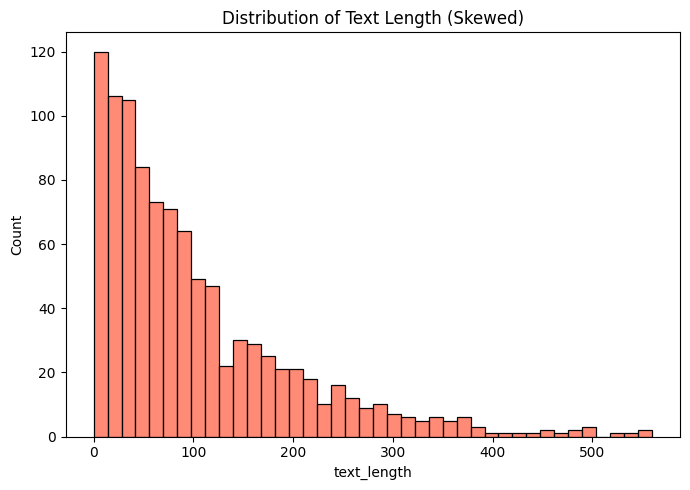

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#  Calculate text length for each row
df['text_length'] = df['clean_text'].apply(len)

#Plot distribution of text lengths
plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=50, color='skyblue')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()




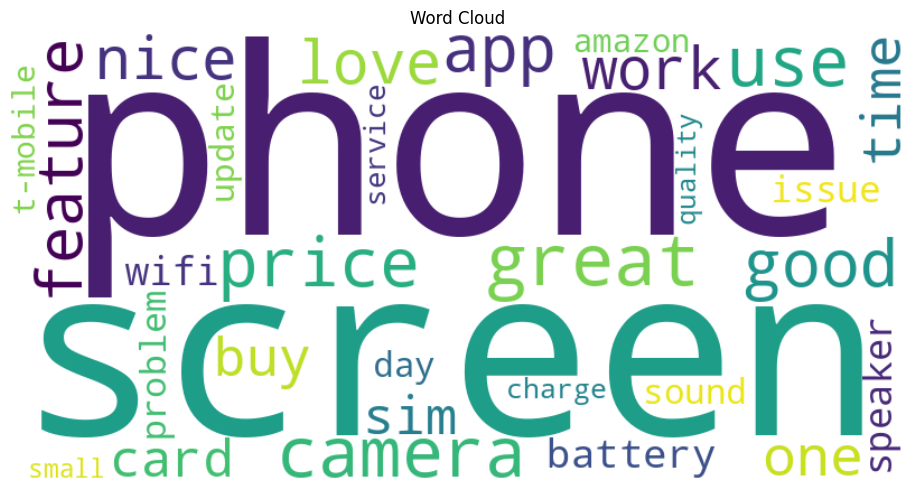

In [ ]:
#Generate and plot Word Cloud
text_corpus = ' '.join(df['clean_text'].dropna())
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(text_corpus)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.tight_layout()
plt.show()

In [ ]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df['clean_text'])

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['kmeans_labels'] = kmeans.fit_predict(X_tfidf)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
df['dbscan_labels'] = dbscan.fit_predict(X_tfidf)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(n_clusters=5)
df['hier_labels'] = hier.fit_predict(X_tfidf.toarray())

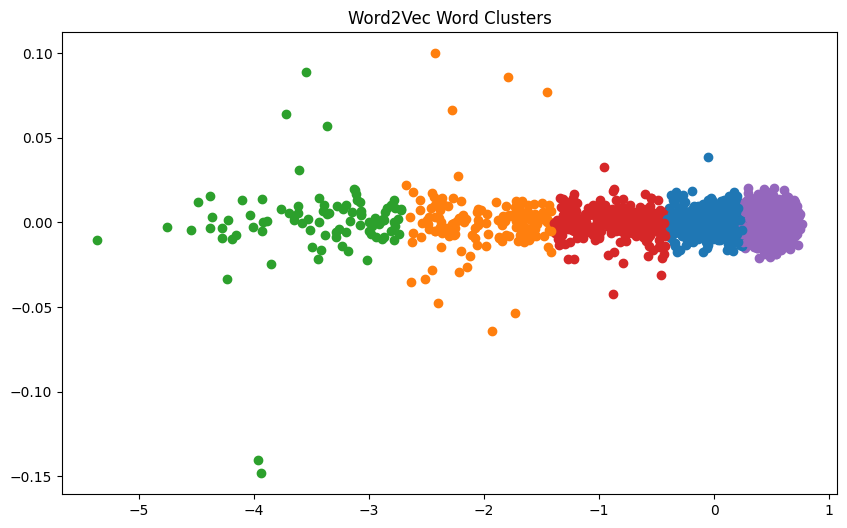

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 🧹 Tokenize the cleaned text into sentences for Word2Vec
sentences = df['clean_text'].dropna().apply(lambda x: x.split()).tolist()

# Train Word2Vec model
w2v_model = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    seed=42
)

# Get word vectors and vocabulary
words = list(w2v_model.wv.index_to_key)
word_vectors = [w2v_model.wv[word] for word in words]

# Cluster word vectors using KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(word_vectors)

#Reduce dimensions with PCA for visualization
pca_result = PCA(n_components=2).fit_transform(word_vectors)

#Plot Word2Vec word clusters
plt.figure(figsize=(10, 6))
for i, word in enumerate(words):
    plt.scatter(pca_result[i, 0], pca_result[i, 1], c=f'C{labels[i]}', label=f'Cluster {labels[i]}' if i == 0 else "")
    # Optional: Uncomment to show word labels
    # plt.text(pca_result[i, 0]+0.01, pca_result[i, 1]+0.01, word, fontsize=6)

plt.title("Word2Vec Word Clusters (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

K-means alongside DBSCAN and Hierarchical clustering allow groupings of data to perform their grouping operations differently. K-means provides quick results through simple operations although it makes the incorrect assumption that data clusters maintain circular proportions. The cluster detection efficiency of DBSCAN surpasses other methods by identifying non-standard shapes and also eliminates outlier data points yet it requires parameter adjustments to work. The construction of group-related hierarchical trees by hierarchical clustering requires extensive processing time when dealing with large datasets. The language clustering methods Word2Vec and BERT exist as embedding tools that convert text to numbers which enables real clustering of language data. Word2Vec analyzes concepts using surrounding word patterns but BERT excels at understanding extensive contextual relationships. The best text clustering performance arises from using BERT since it demonstrates robust understanding of word meanings across different contexts.

.

.

.

.





# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

